In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt

C:\Users\liche\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
buildings = gpd.read_file('buildings_extracted_linked.geojson')
streets = gpd.read_file('streets_linked.geojson')
limit = gpd.read_file('limit.geojson')
tessellation = gpd.read_file('enclosed_tess_simple_linked.geojson')

In [3]:
blg_area = momepy.Area(buildings)
buildings['area'] = blg_area.series

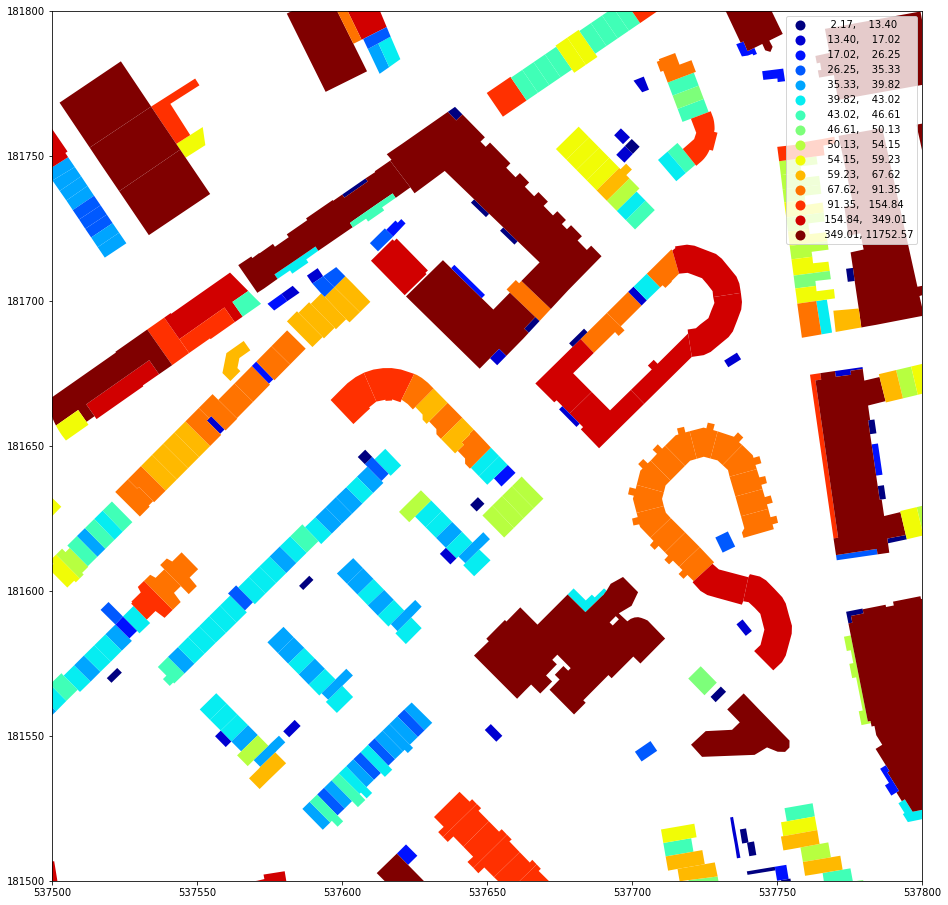

In [4]:
f, ax = plt.subplots(figsize=(16, 16))
buildings.plot(ax=ax, column='area', legend=True, scheme='quantiles', k=15, cmap='jet')
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [5]:
tes_area = momepy.Area(tessellation)
tessellation['area'] = tes_area.series

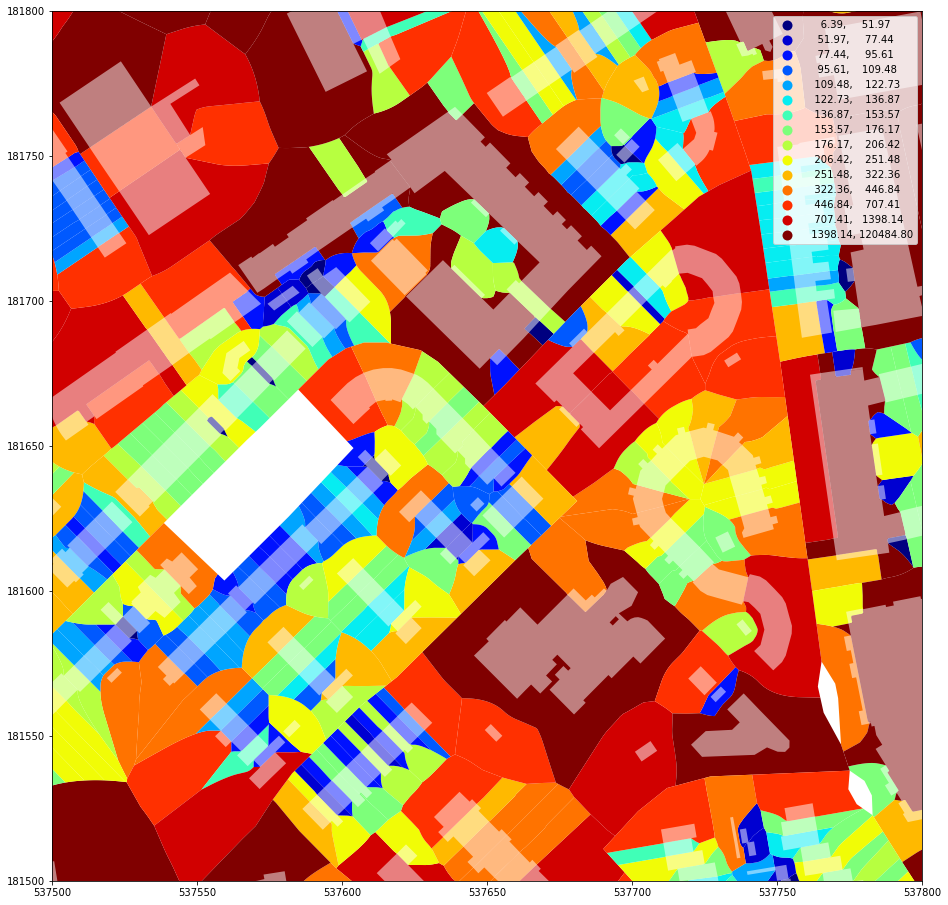

In [6]:
f, ax = plt.subplots(figsize=(16, 16))
tessellation.plot(ax=ax, column='area', legend=True, scheme='quantiles', k=15, cmap='jet')
buildings.plot(ax=ax, color='white', alpha=0.5)
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [8]:
buildings.columns

Index(['OBJECTID', 'fid', 'featurecod', 'version', 'versiondat', 'theme',
       'calculated', 'changedate', 'reasonforc', 'descriptiv', 'descript_1',
       'make', 'physicalle', 'physicalpr', 'poly_broke', 'OBJECTID_2',
       'os_topo_to', 'os_topo_ve', 'bha_proces', 'tileref', 'abshmin', 'absh2',
       'abshmax', 'relh2', 'relhmax', 'bha_conf', 'layer', 'path',
       'TotalEnergyConsumptionCurrent_sum',
       'TotalEnergyConsumptionPotential_sum', 'TotalFloorArea_sum', 'uID',
       'nID', 'nodeID', 'geometry', 'area'],
      dtype='object')

In [9]:
buildings['height'] = buildings['relh2'].fillna(0)

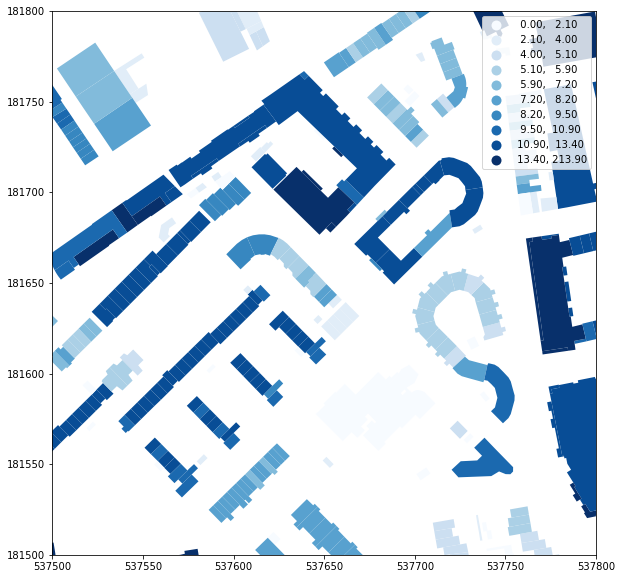

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='height', scheme='quantiles', k=10, legend=True, cmap='Blues')
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [11]:
blg_volume = momepy.Volume(buildings, heights='height')
buildings['volume'] = blg_volume.series

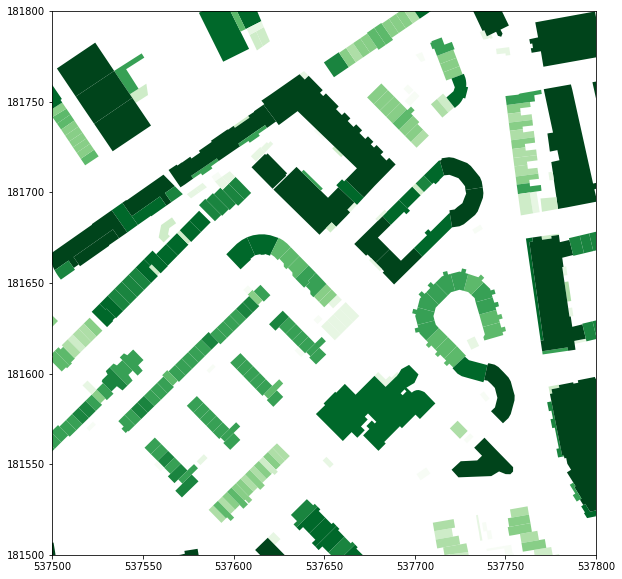

In [12]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='volume', legend=False, scheme='quantiles', k=10, cmap='Greens')
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [13]:
blg_cc = momepy.CircularCompactness(buildings)
buildings['circular_com'] = blg_cc.series

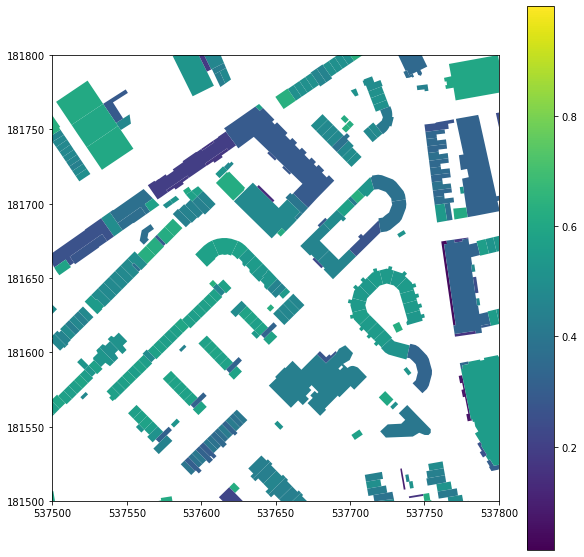

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='circular_com', legend=True, cmap='viridis')
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [32]:
momepy.Elongation(buildings)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [33]:
blg_squareness = momepy.Squareness(buildings)
buildings['squareness'] = blg_squareness.series

In [35]:
buildings['formfactor'] = momepy.FormFactor(buildings, volumes=buildings['volume'], heights=buildings['height']).series

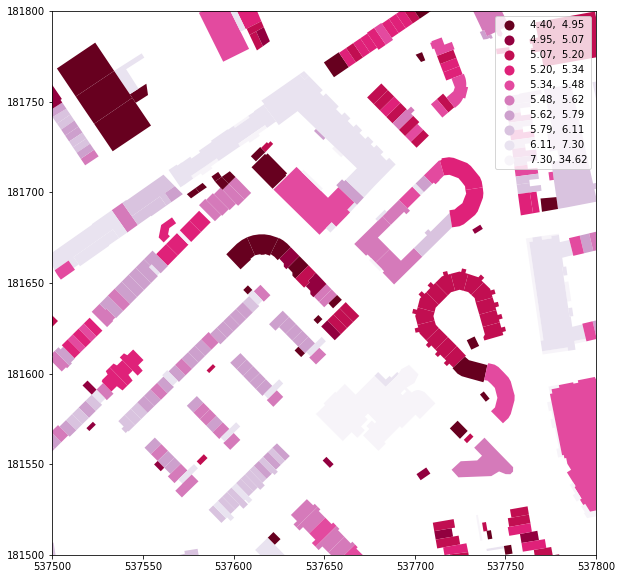

In [36]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='formfactor', legend=True, scheme='quantiles', k=10, cmap='PuRd_r')
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()

In [41]:
edges = gpd.read_file('edges_linked.geojson')
nodes = gpd.read_file('nodes_linked.geojson')

In [42]:
edg_lin = momepy.Linearity(edges)
edges['linearity'] = edg_lin.series

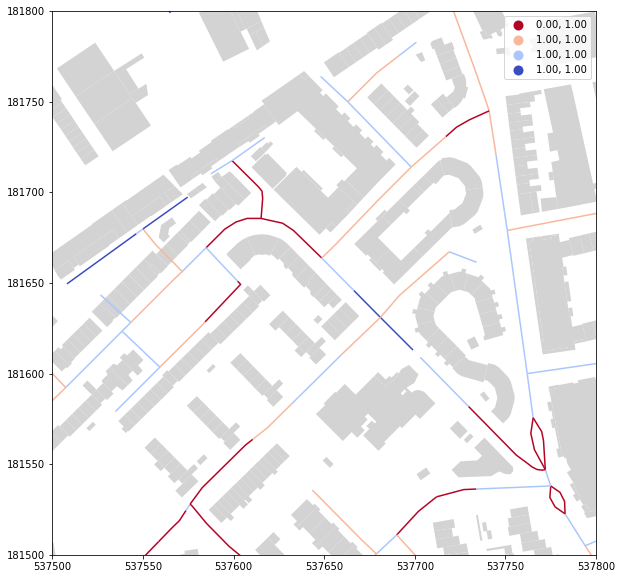

In [43]:
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, column='linearity', legend=True, cmap='coolwarm_r', scheme='quantiles', k=4)
buildings.plot(ax=ax, color='lightgrey')
ax.set_xlim(537500, 537800)
ax.set_ylim(181500, 181800)
plt.show()